## Step 0.1: Install Required Libraries

Prior to running the analysis, ensure that the required libraries are installed. For this, you need only install the libraries defined in the `requirements.txt` file. You can do this by running the following command in your terminal:

```bash
pip install -r requirements.txt
```# EXCEED Python Qualtrics Survey - Visualization

This notebook provides visualizations of the EXCEED Python Qualtrics survey data. The goal is to visualize some of the key metrics and respondents' results to better understand the survey questions and the participants' performance. Put simply, this notebook is a companion to the first 2 notebooks.


## Step 0.1: Install Required Libraries

Prior to running the analysis, ensure that the required libraries are installed. For this, you need only install the libraries defined in the `requirements.txt` file. You can do this by running the following command in your terminal:

```bash
pip install -r requirements.txt
```

In [6]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Step 0.2: Load the data

For this step, we need to load the 3 CSV files that were generated in the previous notebooks:
1. `item_stats.csv`: Contains the statistics for each question in the survey.
2. `question_performance.csv`: Contains the performance of each question in the survey.
3. `top2_items.csv`: Contains the top 2 questions (items) for each block based on the performance.

In [3]:
import pandas as pd

saved_df_path = "../data/processed/"

# Load all required dataframes from CSV files from previous notebooks
stats_df = pd.read_csv(saved_df_path + "item_stats.csv", sep=',')
top2_df = pd .read_csv(saved_df_path + "top2_items.csv", sep=',')
question_perf_df = pd.read_csv(saved_df_path + "question_performance.csv", sep=',')

## Step 1: Visualize Difficulty Histogram

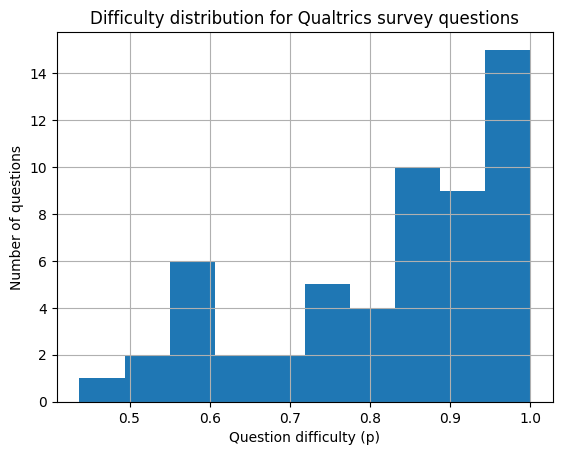

In [5]:
import matplotlib.pyplot as plt

plt.figure()
stats_df['p'].hist(bins=10)
plt.title('Difficulty distribution for Qualtrics survey questions')
plt.xlabel('Question difficulty (p)')
plt.ylabel('Number of questions')
plt.show()

## Step 2.1: More Visualizations for Question Performance

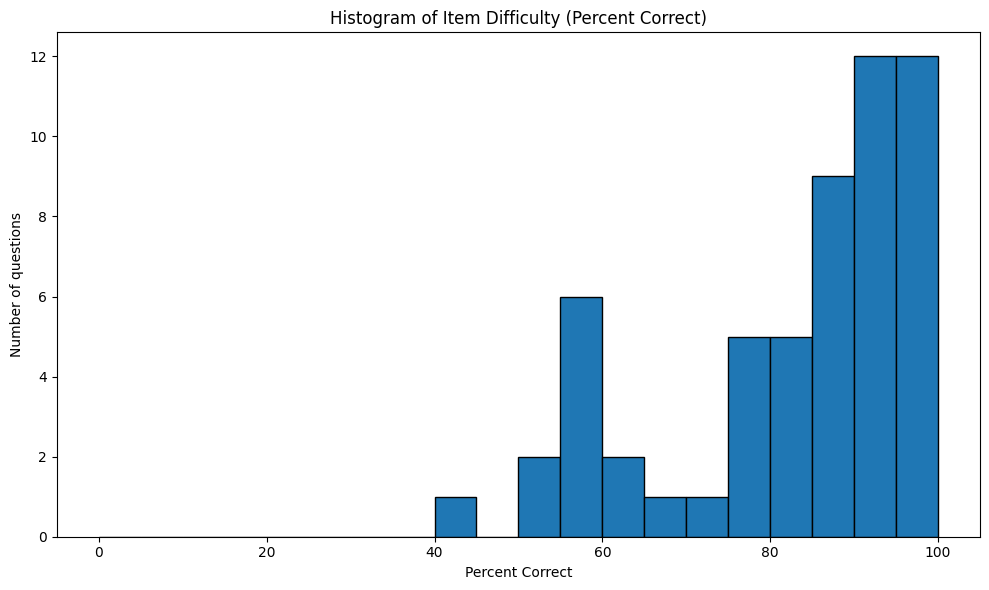

In [8]:
import numpy as np

# Ensure the '% correct' column is numeric
question_perf_df['% correct'] = pd.to_numeric(question_perf_df['% correct'], errors='coerce')

# Create histogram of item difficulty (5-pt bins, 0-100)
plt.figure(figsize=(10, 6))
plt.hist(
    question_perf_df['% correct'].dropna(),
    bins=np.arange(0, 105, 5),
    edgecolor='black'
)
plt.xlabel('Percent Correct')
plt.ylabel('Number of questions')
plt.title('Histogram of Item Difficulty (Percent Correct)')
plt.tight_layout()
plt.show()

## Step 2.2: Horizontal Bar Chart of Question Performance

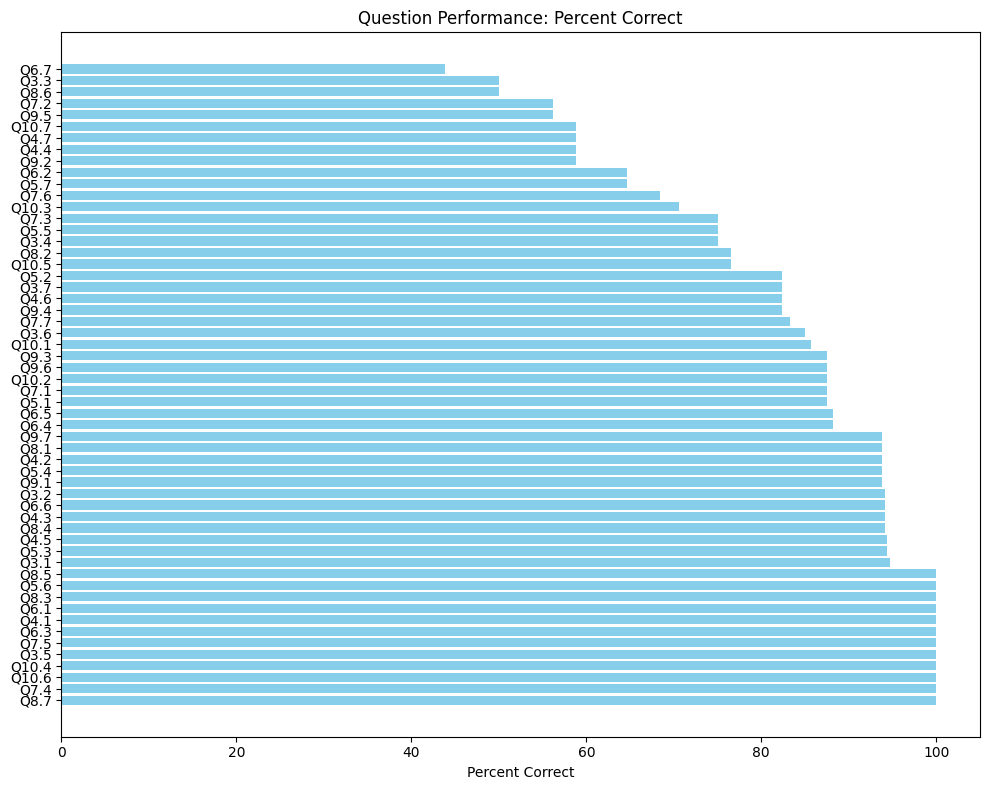

In [9]:
df_sorted_q_perf = question_perf_df.sort_values(by='% correct', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(df_sorted_q_perf['Question'], df_sorted_q_perf['% correct'], color='skyblue')
plt.xlabel('Percent Correct')
plt.title('Question Performance: Percent Correct')
plt.tight_layout()
plt.show()